# Input of txt-file -> transferring to dataFrame

In [43]:
import numpy as np
import pandas as pd

import matplotlib.patches as patches

# from google.colab import files

In [44]:
# Read a CSV file into a DataFrame
# path_annotations = '/content/annotations.txt'

path_annotations = '/Users/myself/Pictures/Kestrix Bootcamp Project/Training_Data_Kestrix/obj_Train_data/DJI_20230504173742_0003_V.txt'

column_names = ["class", "x_center", "y_center", "width", "height"]

# Read the file with a space delimiter and assign the column names
df = pd.read_csv(path_annotations, names=column_names, delimiter=' ')

# Display the DataFrame
print(df)

df.shape

   class  x_center  y_center     width    height
0      0  0.785663  0.776272  0.050030  0.109817
1      0  0.267255  0.387683  0.047035  0.046100
2      0  0.856283  0.764928  0.048330  0.110723
3      0  0.969946  0.738880  0.047648  0.101347
4      0  0.586681  0.788557  0.047648  0.118440
5      0  0.665180  0.778768  0.047990  0.122977


(6, 5)

# SECTION of splitting_image and its functions

# Function: **luc_coordinates**

In [45]:
def luc_coordinates(num_width_comp, num_height_comp, comp_size):
  ''' A function that takes as an input:
  width_comp = number of compartments for the width (e.g. 8)
  height_comp = number of compartments for the height (e.g. 6)
  comp_size = size of each compartment (e.g. 640)
  and returns the coordinates of the left-upper-corner (luc) of
  each compartment
  '''

  # Height and width of the input image
  width = 4000
  height = 3000

  # Step size is the size of the compartments unique pixels horizontally and vertically
  step_size_horiz = width / num_width_comp
  step_size_vert = height / num_height_comp

  # Defining how much overlap there will be between each compartment vertically and horizontally
  overlap_horiz = int(((comp_size * num_width_comp) - width)/num_width_comp)
  overlap_vert = int(((comp_size * num_height_comp) - height)/num_height_comp)

  #creating a list with all the x_coordinates for the compartments (8)
  x_coordinates = [0]
  [x_coordinates.append(int(ele * step_size_horiz)) for ele in range(1, num_width_comp)]

  # creating a list with all the y_coordinates for the compartments (6)
  y_coordinates = [0]
  [y_coordinates.append(int(ele * step_size_vert)) for ele in range(1, num_height_comp)]


  # Creating a dictionary with the coordinates
  coordinates_dict = {}
  b = 0 # no inherent important meaning

  for ele in range (0, num_height_comp):
    for i in range (0, num_width_comp):
      a = [x_coordinates[i], y_coordinates[ele]]
      b += 1
      coordinates_dict[f'cor_{b}'] = a

  return coordinates_dict

# Function: **splitting_into_compartments**

In [46]:
def splitting_into_compartments(tensor):
  '''
  Takes as an input the Tensor that represents the
  whole image that is supposed to be split into compartments.
  The tensor should have the shape (4140, 3140, 3)
  '''

  # Calling the function 'luc_coordinates' and saving the resulting dictionary of coordinates in a variable
  coordinates_dict = luc_coordinates(num_width_comp, num_height_comp, comp_size)

  slize_size = 640

  # Turning the coordinates into a list
  coordinates_list = [value for key, value in coordinates_dict.items()]

  # creating a for loop for getting the correct slizing integers and putting them into a dictionary
  slicing_dict = {}

  for i in range (0, 48):
    slice_1, slice_2 = coordinates_list[i][0], coordinates_list[i][1]
    slice_1_a = slice_1
    slice_1_b = slice_1_a + slize_size
    slice_2_a = slice_2
    slice_2_b = slice_2_a + slize_size
    slicing_dict[i] = [slice_1_a, slice_1_b, slice_2_a, slice_2_b]

  # slicing the input-tensor to get (48) of shape (640, 640, 3)
  list_of_tensors = [tensor[slicing_dict[ele][0]:slicing_dict[ele][1],
                                 slicing_dict[ele][2]:slicing_dict[ele][3],

                                 ] for ele in range (0, 48)]

  #optional, if needed:
  compartment_tensors = np.array(list_of_tensors)

  return compartment_tensors

# Function: **slicing_dictionary**

In [47]:
def slicing_dictionary(tensor):

  # Calling the function 'luc_coordinates' and saving the resulting dictionary of coordinates in a variable
  # coordinates_dict = luc_coordinates(num_width_comp, num_height_comp, comp_size)

  slize_size = 640

  # Turning the coordinates into a list
  coordinates_list = [value for key, value in coordinates_dict.items()]

  # creating a for loop for getting the correct slizing integers and putting them into a dictionary
  slicing_dict = {}

  for i in range (0, 48):
    slice_1, slice_2 = coordinates_list[i][0], coordinates_list[i][1]
    slice_1_a = slice_1
    slice_1_b = slice_1_a + slize_size
    slice_2_a = slice_2
    slice_2_b = slice_2_a + slize_size
    slicing_dict[i] = [slice_1_a, slice_1_b, slice_2_a, slice_2_b]

  return slicing_dict

# SECTION of splitting_bounding_boxes and its functions

# Function: getting_bounding_boxes

In [48]:
def getting_bounding_boxes(width_img, height_img, comp_size, bb):
  '''
  Requirement: Having access to the annotations for one image in
  a pd.DataFrame
  Inputs:
  width_img = Width of the input image (right now 4000)
  height_img = Height of the input image (right now 3000)
  comp_size = size we want for each compartment (right now 640 (x 640))
  bb = bounding box
  Outputs:
  We calculate: x_min, y_min, x_max, y_max which can then be used
  to get the coordinates of each corner of the bounding box
  '''
  # Defining the width and height of the compartment
  width_comp = comp_size
  height_comp = comp_size

  # getting the x_center, y_center, width, height from the first bounding box
  x_center = df.iloc[bb]['x_center']                  # = 0.785663
  y_center = df.iloc[bb]['y_center']                  # = 0.776272
  first_width = df.iloc[bb]['width']                  # = 0.05003
  first_height = df.iloc[bb]['height']                # = 0.109817
  class_object = int(df.iloc[bb]['class'])            # = 0 ('car')

  #MAYBE splitting what's above and creating a for-loop for all the annotations

  # Transferring to the actual width and height of the image
  x_center = round(x_center * width_img)            # = 3143
  y_center = round(y_center * height_img)           # = 2329
  first_width = round(first_width * width_img)        # = 200
  first_height = round(first_height * height_img)     # = 329

  # Calculating the 4 cornerpoints, for which we need 4 numbers: x_min, x_max, y_min, y_max
  # (Adding 70 for each because of the padding of zeros around the original image)
  x_min = int(x_center - (first_width / 2)) + 70  # left = 3043
  x_max = int(x_center + (first_width / 2)) + 70 # right = 3243
  y_min = int(y_center - (first_height / 2))+ 70 # top = 2164
  y_max = int(y_center + (first_height / 2))+ 70 # bottom = 2493

  return x_min, y_min, x_max, y_max, class_object


# Function: checking_bounding_box



In [49]:
def checking_bounding_box(compartment_num):
  '''
  Input to this function is the number of the compartment for which it
  should be tested whether the bounding box is inside or not
  And the output of function: getting_bounding_boxes
  With this we want to take one row of the txt.file (pd.DataFrame)
  that represents one bounding box in the original image
  Output of the function:
  True if some part of the bounding box lies in the compartment
  False if the bounding box doesn't lie in the compartment!
  '''

  # If one of x_min, x_max AND one of y_min, y_max in the compartment -> True else False
  if ((x_min in range(slicing_dict[compartment_num][0], slicing_dict[compartment_num][1] + 1)
    or x_max in range(slicing_dict[compartment_num][0], slicing_dict[compartment_num][1] +1))
    and
     ((y_min in range(slicing_dict[compartment_num][2], slicing_dict[compartment_num][3] + 1)
    or y_max in range(slicing_dict[compartment_num][2], slicing_dict[compartment_num][3] + 1)))):
    tmp_var = True
  else:
    tmp_var = False


#[slicing_dict[0][0]:slicing_dict[0][1],
#slicing_dict[0][2]:slicing_dict[0][3]
  return tmp_var

# Function: checking_for_9_cases

In [50]:
def checking_for_9_cases():
  '''
  ONLY ACTIVATE IF function: checking_bounding_box == TRUE
  Because then we know: Some part of that bounding box lies in
  this compartment!
  We want to
  '''

  # Checking for the next cases (9!)

  # Setting x_min to its value if it is in the range - otherwise setting it to be at the edge (x_min = 0!)
  if x_min in range(slicing_dict[compartment_num][0], slicing_dict[compartment_num][1] + 1):
    x_min_tmp = x_min
  else:
    x_min_tmp = slicing_dict[compartment_num][0]

  # Setting x_max to its value if it is in the range - otherwise setting it to be at the edge (x_max = 1!)
  if x_max in range(slicing_dict[compartment_num][0], slicing_dict[compartment_num][1] + 1):
    x_max_tmp = x_max
  else:
    x_max_tmp = slicing_dict[compartment_num][1]

  # Doing the same for y_min and y_max!
  if y_min in range(slicing_dict[compartment_num][2], slicing_dict[compartment_num][3] + 1):
    y_min_tmp = y_min
  else:
    y_min_tmp = slicing_dict[compartment_num][2]

  if y_max in range(slicing_dict[compartment_num][2], slicing_dict[compartment_num][3] + 1):
    y_max_tmp = y_max
  else:
    y_max_tmp = slicing_dict[compartment_num][3]

  # Returning the 4 coordinates in the XYXY class - format
  return x_min_tmp, y_min_tmp, x_max_tmp, y_max_tmp

# Function: to_absolute_coordinates_xyxy


In [51]:
def to_absolute_coordinates_xyxy():
  '''
  Calculates the absolute coordinates of a bounding box
  for a single compartment
  Output: absolute coordinates in form (xyxy = x_min, y_min, x_max, y_max)
  '''
  abs_x_min = x_min_tmp - slicing_dict[compartment_num][0]
  # print(slicing_dict[compartment_num][0])
  abs_x_max = x_max_tmp - slicing_dict[compartment_num][0]
  abs_y_min = y_min_tmp - slicing_dict[compartment_num][2]
  # print(slicing_dict[compartment_num][2])
  abs_y_max = y_max_tmp - slicing_dict[compartment_num][2]

  return abs_x_min, abs_y_min, abs_x_max, abs_y_max

In [ ]:
# Function luc_coordinates
num_width_comp = 8
num_height_comp = 6
comp_size = 640

coordinates_dict = luc_coordinates(num_width_comp, num_height_comp, comp_size)
coordinates_dict

# Output = x, y of each left upper corner (luc) for each compartment

In [39]:
# Image-level: Getting the bounding box coordinates ONCE for the whole image
width_img = 4000
height_img = 3000
comp_size = 640

corner_points_of_bounding_boxes_original_image_with_padding = {}

for i in range(0, df.shape[0]):

  bb = i
  #function: getting_bounding_boxes
  x_min, y_min, x_max, y_max, class_object = getting_bounding_boxes(width_img, height_img, comp_size, bb)
  corner_points_of_bounding_boxes_original_image_with_padding[f'bb_{bb}'] = [x_min, y_min, x_max, y_max, class_object]

cp_bb = corner_points_of_bounding_boxes_original_image_with_padding  # = dict
cp_bb

{'bb_0': [3113, 2234, 3313, 2563, 0],
 'bb_1': [1045, 1164, 1233, 1302, 0],
 'bb_2': [3398, 2199, 3591, 2531, 0],
 'bb_3': [3854, 2135, 4045, 2439, 0],
 'bb_4': [2321, 2258, 2512, 2613, 0],
 'bb_5': [2635, 2221, 2827, 2590, 0]}

# Pipeline (1)

In [40]:
# Pipeline from Input-tensor to slicing_dict + cp_bb

def pipeline_input_to_slicing_dict():

  # Calling the function 'luc_coordinates'
  coordinates_dict = luc_coordinates(num_width_comp, num_height_comp, comp_size)

  #Calling the function 'slicing_dictionary'
  slicing_dict = slicing_dictionary(tensor)

  # Image-level: Getting the bounding box coordinates ONCE for the whole image
  corner_points_of_bounding_boxes_original_image_with_padding = {}

  for i in range(0, df.shape[0]):

    bb = i
    #function: getting_bounding_boxes
    x_min, y_min, x_max, y_max, class_object = getting_bounding_boxes(width_img, height_img, comp_size, bb)
    corner_points_of_bounding_boxes_original_image_with_padding[f'bb_{bb}'] = [x_min, y_min, x_max, y_max, class_object]

  cp_bb = corner_points_of_bounding_boxes_original_image_with_padding  # = dict
  cp_bb


# Pipeline: pipeline_getting_df_comps

In [41]:
def pipeline_getting_df_comps():
  '''
  What we need before this works:
  The df from the txt of original image (needs to be called 'df')
  The output of another pipeline: slicing_dict
  '''

    # Create an empty DataFrame with the specified columns
  columns = ['class', 'x_min', 'y_min', 'x_max', 'y_max']
  data_frame = pd.DataFrame(columns=columns)
  data_frame

  # Running this once, so that I have a dictionary full of names for the dataframes that come out of my loops
  dict_df_comps = {}

  for i in range (0, 48):
    dict_df_comps[i] = f'df_comp_{i}'

  # For Loop for each compartment (compartment-level)
  for key, value in slicing_dict.items():
    #print(key)
    #print(value)
    compartment_num = key
    # print(key, f'compartment')
    dict_df_comps[key] = data_frame.copy()

    # For Loop for each bounding box (boundingbox-level)
    for k, v in cp_bb.items():

      # calling function: checking_bounding_box (Output = True or False)
      x_min = v[0]
      y_min = v[1]
      x_max = v[2]
      y_max = v[3]
      class_object = v[4]
      #print(x_min)
      #print(y_min)
      #print(x_max)
      #print(y_max)
      if checking_bounding_box(compartment_num):
        # print('True')
        #calling the function: checking_for_9_cases
        x_min_tmp, y_min_tmp, x_max_tmp, y_max_tmp = checking_for_9_cases()
        # print(x_min_tmp, y_min_tmp, x_max_tmp, y_max_tmp)
        abs_x_min, abs_y_min, abs_x_max, abs_y_max = to_absolute_coordinates_xyxy()
        # print(abs_x_min, abs_y_min, abs_x_max, abs_y_max)

        #Adding those to a dataframe with the original class
        list_ready = [class_object, abs_x_min, abs_y_min, abs_x_max, abs_y_max]
        dict_df_comps[key].loc[0] = list_ready

      # else:
        # print('False')
        # continue or cut the else

  return dict_df_comps

    #Output is the dict_df_comps

# First small Pipeline to test

In [ ]:
# Inputs we need
tensor = np.ones((4140, 3140, 3))
num_width_comp = 8
num_height_comp = 6
comp_size = 640

# first pipeline
slicing_dict, cp_bb = pipeline_input_to_slicing_dict()
slicing_dict, cp_bb

# Pipeline from Input-tensor to slicing_dict + cp_bb

# New Section

In [ ]:
# Create an empty DataFrame with the specified columns
columns = ['class', 'x_min', 'y_min', 'x_max', 'y_max']
data_frame = pd.DataFrame(columns=columns)
data_frame

# Running this once, so that I have a dictionary full of names for the dataframes that come out of my loops
dict_df_comps = {}

for i in range (0, 48):
  dict_df_comps[i] = f'df_comp_{i}'

# For Loop for each compartment (compartment-level)
for key, value in slicing_dict.items():
  #print(key)
  #print(value)
  compartment_num = key
  print(key, f'compartment')
  dict_df_comps[key] = data_frame.copy()

  # For Loop for each bounding box
  for k, v in cp_bb.items():

    # calling function: checking_bounding_box (Output = True or False)
    x_min = v[0]
    y_min = v[1]
    x_max = v[2]
    y_max = v[3]
    class_object = v[4]
    #print(x_min)
    #print(y_min)
    #print(x_max)
    #print(y_max)
    if checking_bounding_box(compartment_num):
      print('True')
      #calling the function: checking_for_9_cases
      x_min_tmp, y_min_tmp, x_max_tmp, y_max_tmp = checking_for_9_cases()
      # print(x_min_tmp, y_min_tmp, x_max_tmp, y_max_tmp)
      abs_x_min, abs_y_min, abs_x_max, abs_y_max = to_absolute_coordinates_xyxy()
      # print(abs_x_min, abs_y_min, abs_x_max, abs_y_max)

      #Adding those to a dataframe with the original class
      list_ready = [class_object, abs_x_min, abs_y_min, abs_x_max, abs_y_max]
      dict_df_comps[key].loc[0] = list_ready
    else:
      print('False')
      # continue or cut the else
  print(dict_df_comps[key])

  #Output is the dict_df_comps

0 compartment
False
False
False
False
False
False
Empty DataFrame
Columns: [class, x_min, y_min, x_max, y_max]
Index: []
1 compartment
False
False
False
False
False
False
Empty DataFrame
Columns: [class, x_min, y_min, x_max, y_max]
Index: []
2 compartment
False
False
False
False
False
False
Empty DataFrame
Columns: [class, x_min, y_min, x_max, y_max]
Index: []
3 compartment
False
False
False
False
False
False
Empty DataFrame
Columns: [class, x_min, y_min, x_max, y_max]
Index: []
4 compartment
False
False
False
False
False
False
Empty DataFrame
Columns: [class, x_min, y_min, x_max, y_max]
Index: []
5 compartment
False
False
False
False
False
False
Empty DataFrame
Columns: [class, x_min, y_min, x_max, y_max]
Index: []
6 compartment
False
False
False
False
False
False
Empty DataFrame
Columns: [class, x_min, y_min, x_max, y_max]
Index: []
7 compartment
False
False
False
False
False
False
Empty DataFrame
Columns: [class, x_min, y_min, x_max, y_max]
Index: []
8 compartment
False
False
False


In [ ]:
dict_df_comps[37]

,class,x_min,y_min,x_max,y_max
0,0,135,221,327,590


In [ ]:
# Function getting_bounding_boxes

width_img = 4000
height_img = 3000

x_min, y_min, x_max, y_max = getting_bounding_boxes(width_img, height_img, comp_size)
x_min, y_min, x_max, y_max

(3113, 2234, 3313, 2563)

In [ ]:
# Function checking_bounding_box
compartment_num = 45

tmp_var = checking_bounding_box(compartment_num)
tmp_var

True

In [ ]:
# Function checking_for_9_cases

if tmp_var:
  x_min_tmp, y_min_tmp, x_max_tmp, y_max_tmp = checking_for_9_cases()
  print(x_min_tmp, y_min_tmp, x_max_tmp, y_max_tmp)
else:
  print('Bounding box not in compartment')

3113 2500 3140 2563


In [ ]:
# Function to_absolute_coordinates_xyxy
# Input needed: x_min_tmp, y_min_tmp, x_max_tmp, y_max_tmp

abs_x_min, abs_y_min, abs_x_max, abs_y_max = to_absolute_coordinates_xyxy()
abs_x_min, abs_y_min, abs_x_max, abs_y_max

(613, 0, 640, 63)

# Testing stuff

In [ ]:
# example coordinates: (3113 2234 3140 2563) (x_min, y_min, x_max, y_max)
# compartment: 37: [2500, 3140 | 2000, 2640], (x | y)

# Transformation into absolute or relative coordinates of that compartment!

x_min = 3113
x_max = 3140
y_min = 2234
y_max = 2563

xmin_comp = slicing_dict[compartment_num][0]
ymin_comp = slicing_dict[compartment_num][2]

abs_x_min = x_min - xmin_comp
abs_x_max = x_max - xmin_comp
abs_y_min = y_min - ymin_comp
abs_y_max = y_max - ymin_comp

abs_x_min, abs_y_min, abs_x_max, abs_y_max


In [ ]:
# Trying to show the image and separate into 48 compartments
# Then plotting the bounding boxes of each compartment (or 2-3)


In [ ]:
pip install opencv-python

Saving DJI_20230504173742_0003_V.JPG to DJI_20230504173742_0003_V.JPG


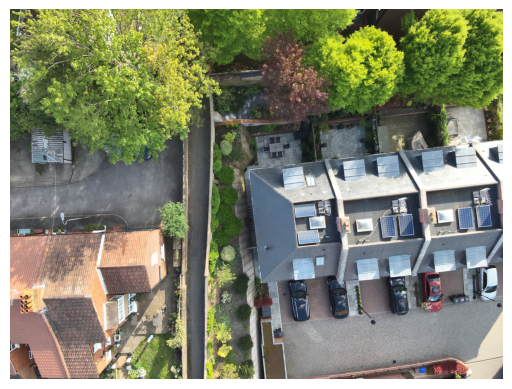

In [ ]:
from google.colab import files
from PIL import Image
import matplotlib.pyplot as plt
import cv2

# Upload an image
uploaded = files.upload()

# Load the image using PIL
image_path = list(uploaded.keys())[0]
image = Image.open(image_path)

# Display the image
plt.imshow(image)
plt.axis('off')
plt.show()

# Individual steps

In [ ]:
# Read a CSV file into a DataFrame
path_annotations = '/content/annotations.txt'

column_names = ["class", "x_center", "y_center", "width", "height"]

# Read the file with a space delimiter and assign the column names
df = pd.read_csv(path_annotations, names=column_names, delimiter=' ')

# Display the DataFrame
print(df)

df.shape

   class  x_center  y_center     width    height
0      0  0.785663  0.776272  0.050030  0.109817
1      0  0.267255  0.387683  0.047035  0.046100
2      0  0.856283  0.764928  0.048330  0.110723
3      0  0.969946  0.738880  0.047648  0.101347
4      0  0.586681  0.788557  0.047648  0.118440
5      0  0.665180  0.778768  0.047990  0.122977


(6, 5)

In [ ]:
# Example with the first compartment 0,0,640,640 - Defining variables
width_img = 4000
height_img = 3000
x_comp = 0
y_comp = 0
width_comp =  640
height_comp = 640

# Any bounding box that has a point in the range of x -> 0 - 640 and y -> 0 - 640 is potentially relevant

# getting the x_center, y_center from the first bounding box
x_center = df.iloc[0]['x_center']                  # = 0.785663
y_center = df.iloc[0]['y_center']                  # = 0.776272
x_center, y_center

# Transferring to the actual width and height of the image
x_center = round(x_center * width_img)            # = 3143
y_center = round(y_center * height_img)           # = 2329

# getting the width and height from the first bounding box
first_width = df.iloc[0]['width']           # = 0.05003
first_height = df.iloc[0]['height']         # = 0.109817

# Transferring to the actual width and height of the image
first_width = round(first_width * width_img)        # = 200
first_height = round(first_height * height_img)     # = 329

In [ ]:
# Checking if bounding box somehow in compartment

x_comp = 0
y_comp = 0
width_comp =  640
height_comp = 640

# PROBABLY NOT RELEVANT
if ((x_min in range(x_comp, width_comp + 1) or x_max in range(x_comp, width_comp +1))       # checking whether x_min or x_max are in the first compartment
  or
    ((y_min in range(y_comp, height_comp + 1) or y_max in range(y_comp, height_comp + 1)))): # checking whether y_min or y_max are in the first compartment
  print(True)                                                                                 # If ANY of x_min, x_max, y_min, y_max are in the first compartment -> True
else:
  print(False)                                                                                # Otherwise: False


# If it is not in the compartment, we don't need to do anything -> continue
# If it IS in the compartment, we have to check, whether we want to include this bounding box in training!


False


Idea: The overlapping can help us here. On every edge (special case: original image edge) we know, that this part will be part of another compartment as well. So if we were to have a small part of a bounding box 'lurking' into a compartment (e.g. 20 pixels in width, 30 pixels in height), we know, that a bigger part (probably the whole object) will be captured by a neighboring-compartment.


Another thought: We should probably choose an overlapping-size that gives us the confidence, that no single person gets 'cut' into half. So if there's no person that takes more than 140 pixels in width or height, an overlapping of 140 pixels works nicely.
Persons: 10-70 pixels, 70 - 120 pixels high
Cars: 250-350 pixels long / 120 - 180 pixels wide


In [ ]:
# So there are 3 cases of a bounding box laying in a compartment

# Case 1: All 4 ( x_min, x_max, y_min, y_max) are part of the compartment = the whole box lies in the compartment -> Easiest Case
# (It is impossible to have only 3 in the compartment)

# Case 2: 2 of them are in a compartment -> 4 edges -> 4 possible combinations

# Case 3: 1 of them are in the compartment -> could be each one of those 4 -> 4 possible combinations

# --> Overall 9 specific cases


3 overall Cases (9 specific ones)

-> Test which one of the 3 it is first
-> Then going into detail

In [ ]:
# If we have the coordinates of all 4 corners and none of them lies in compartment 1, then no part of the bounding box is in that compartment

# Calculating the 4 cornerpoints, for which we need 4 numbers: x_min, x_max, y_min, y_max

x_min = int(x_center - (first_width / 2))   # left = 3043
x_max = int(x_center + (first_width / 2))   # right = 3243
y_min = int(y_center - (first_height / 2))  # top = 2164
y_max = int(y_center + (first_height / 2))  # bottom = 2493

x_min, x_max, y_min, y_max

(3043, 3243, 2164, 2493)

# asdf

In [ ]:
# Checking for the next cases (9!)
if tmp_var:
  # Setting x_min to its value if it is in the range - otherwise setting it to be at the edge (x_min = 0!)
  if x_min in range(x_comp, width_comp + 1):
    x_min_tmp = x_min
  else:
    x_min_tmp = 0

  # Setting x_max to its value if it is in the range - otherwise setting it to be at the edge (x_max = 1!)
  if x_max in range(x_comp, width_comp + 1):
    x_max_tmp = x_max
  else:
    x_max_tmp =

  # Doing the same for y_min and y_max!
  if y_min in range(y_comp, height_comp + 1):
    y_min_tmp = y_min
  else:
    y_min_tmp = 0

  if y_max in range(y_comp, height_comp + 1):
    y_max_tmp = y_max
  else:
    y_max_tmp =

else:
  print('Something is wrong, search for the mistake!')

x_min_tmp, y_min_tmp, x_max_tmp, y_max_tmp

Something is wrong, search for the mistake!


(500, 1, 500, 0)

In [ ]:
#Getting the coordinates of the bounding box!

luc = (x_min_tmp, y_min_tmp)    # left upper corner
ruc = (x_max_tmp, y_min_tmp)    # right upper corner
lbc = (x_min_tmp, y_max_tmp)    # left bottom corner
rbc = (x_max_tmp, y_min_tmp)     # right bottom corner

luc, ruc, lbc, rbc

((500, 500), (1, 500), (500, 0), (1, 500))

In [ ]:
range(x_comp, width_comp + 1), range(y_comp, height_comp + 1)

(range(0, 641), range(0, 641))

In [ ]:
# First check whether it is even possible to

In [ ]:
x_min = 1000
x_max = 1000
y_min = 500
y_max = 1000

In [ ]:
# Checking for Case 1: Is bounding box somehow in compartment?

if ((x_min in range(x_comp, width_comp + 1) or x_max in range(x_comp, width_comp +1))       # checking whether x_min or x_max are in the first compartment
  and
    ((y_min in range(y_comp, height_comp + 1) or y_max in range(y_comp, height_comp + 1)))): # checking whether y_min or y_max are in the first compartment
  tmp_var = True                                                                                 # If ANY of x_min, x_max, y_min, y_max are in the first compartment -> True
else:
  tmp_var = False                                                                             # Otherwise: False

if tmp_var:
  print('Continue')
else:
  print('Bounding box IS NOT in that compartment!')


Bounding box IS NOT in that compartment!


# Irrelevant for now

In [ ]:


# Assuming 'my_image.jpg' is the path to your image file
# new_image_path, new_label_path
new_image_path = 'DJI_20230504173852_0102_V_flipped.jpg'
new_label_path = 'DJI_20230504173852_0102_V_flipped.txt'

image = Image.open(new_image_path)

# Display the image
plt.imshow(image)
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()

# Plot the bounding boxes
fig, ax = plt.subplots(1, figsize=(12, image.height / image.width * 12))
ax.imshow(image)

# Sample bounding boxes: list of dictionaries
bounding_boxes = [
    {'x': a[1]*image.width, 'y': a[2]*image.height, 'width': a[3] * image.width, 'height': a[4] * image.height}  # Example coordinates
]

# Add bounding boxes to the image
for bbox in bounding_boxes:
    rect = patches.Rectangle((bbox['x'], bbox['y']), bbox['width'], bbox['height'], linewidth=2, edgecolor='r', facecolor='none')
    ax.add_patch(rect)

# Display the image with bounding boxes
plt.axis('off')  # Hide axes ticks
plt.show()